In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def rexp(lam, sim):
    lista=[]
    for i in range (sim):
        u = np.random.random()
        x=-1/lam*np.log(u)
        lista.append(x)
    return np.array(lista)

In [92]:
def rmarkovchain2(pi, l, T):
    P = np.array([[0.2,0.4,0.4], [0.1, 0.45, 0.45], [0.3, 0.5, 0.2]])
    states = [0, 1, 2] #0 mantiene, #1 que suba y 2 que baje.
    t1 = [] # Lista para guardar los tiempos de cada state
    tc = []
    X = [np.random.choice(states, p = pi, size = 1)[0]] # Simulamos X0 usando pi 
    tx = rexp(7, 100).mean()
    t = tx
    tc.append(t)
    t1.append(tx)
    while T>t:
        estado_act = X[-1]
        next_est = np.random.choice(states, p = P[estado_act])
        tx = rexp(2, 10000).mean()
        t1.append(tx)
        t = t + tx
        tc.append(t)
        X.append(next_est)
    return np.array(X), np.array(t1), np.array(tc)

In [96]:
x, t1, tc = rmarkovchain2([0.5, 0.3, 0.2], 5, 10)

In [107]:
print(f'{x}') # El arreglo de cada estado simulado 
print(f'{t1}') # El arreglo de cada rtiempo 
print(f'{tc}') # El arreglo de cada tiempo acumulado 

[2 1 2 1 2 2 1 0 1 2 1 2 0 1 0 1 1 0 1 1 1]
[0.1413539  0.49504393 0.49677401 0.50808221 0.5065151  0.49227608
 0.49922397 0.49775799 0.4985014  0.5029979  0.50372448 0.50362781
 0.49598012 0.49324192 0.5004212  0.50478145 0.50586699 0.4943439
 0.49417595 0.49614108 0.50054744]
[ 0.1413539   0.63639782  1.13317184  1.64125405  2.14776915  2.64004523
  3.13926919  3.63702719  4.13552859  4.63852649  5.14225097  5.64587879
  6.1418589   6.63510082  7.13552202  7.64030348  8.14617046  8.64051437
  9.13469032  9.6308314  10.13137883]


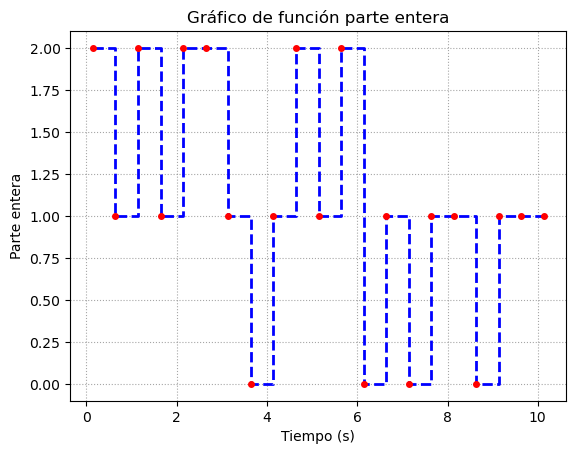

In [120]:
plt.step(tc, x, where = 'post', color = 'blue', linestyle = '--', linewidth = 2)
plt.plot(tc, x, 'o', color = 'red', markersize = 4)
plt.xlabel('Tiempo (s)')
plt.ylabel('Parte entera')
plt.title('Gráfico de función parte entera')
plt.grid(True, linestyle = ':', color = 'grey', alpha = 0.7)
plt.show()